In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
print(data.files)

['dtw_syr', 'dtw_condyr', 'dtw_s_nmax_yr', 'dtw_nmax_yr', 'dtw_vyr', 'dtw_tyr', 'dtw_resyr', 'HydroID', 'lat', 'lon', 'dtw_interc_t', 'dtw_slop_t']


In [9]:
lat    = data.f.lat
lon    = data.f.lon
icond  = data.f.dtw_condyr
tslope = data.f.dtw_slop_t
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
#lat = data.f.lat
ipass = np.where(icond==1)[0]

In [13]:
glon = np.linspace(114,160,50)
glat = np.linspace(-45,-10,50)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.median(tslope[jloc])  # calculo de la mediana

In [19]:
nlon, nlat = 50, 50 
glon = np.linspace(114, 160, nlon)
glat = np.linspace(-45, -10, nlat)

# Crear matriz vacía para llenar con los valores de mn_slope
mn_slope_grid = np.full((nlat, nlon), np.nan)  # Inicializar con NaN

# Llenar la matriz con valores de pendiente
for i in range(len(X)):
    xi = np.searchsorted(glon, X[i]) - 1
    yi = np.searchsorted(glat, Y[i]) - 1
    if 0 <= xi < nlon and 0 <= yi < nlat:
        mn_slope_grid[yi, xi] = mn_slope[i]

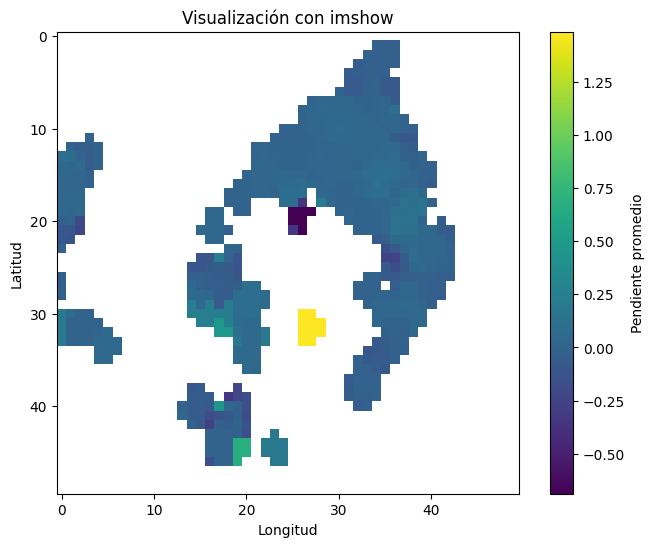

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(mn_slope_grid)
plt.colorbar(label="Pendiente promedio")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Visualización con imshow")
plt.show()

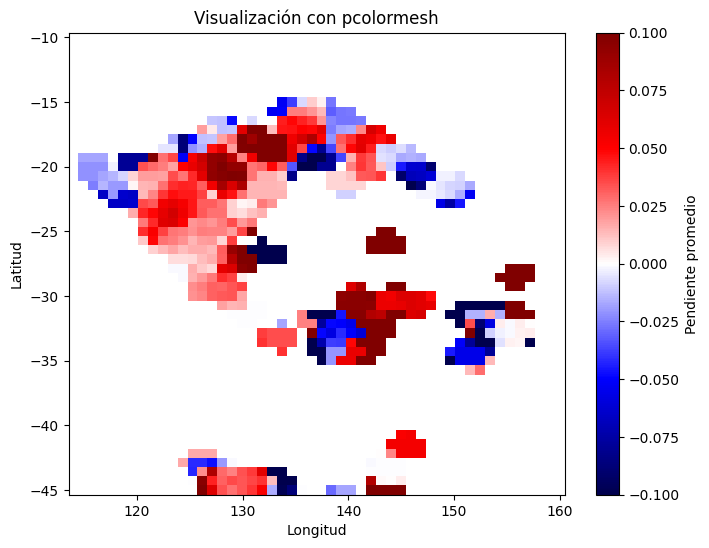

In [31]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(glon, glat, mn_slope_grid.T, cmap="seismic", vmin=-0.1, vmax=0.1, shading='auto')
plt.colorbar(label="Pendiente promedio")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Visualización con pcolormesh")
plt.show()